In [ ]:
#https://towardsdatascience.com/nlp-text-generation-through-bidirectional-lstm-model-9af29da4e520

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np

In [2]:
tokenizer = Tokenizer()
data = open('data.txt').read()
corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [3]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [4]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [5]:
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [6]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 14, 100)           383000    
_________________________________________________________________
bidirectional (Bidirectional (None, 14, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 14, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1915)              193415    
_________________________________________________________________
dense_1 (Dense)              (None, 3830)              7338280   
Total params: 8,376,295
Trainable params: 8,376,295
Non-trainable params: 0
______________________________________________

In [7]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
574/574 [==============================] - 17s 14ms/step - loss: 6.9542 - accuracy: 0.0270
Epoch 2/100
574/574 [==============================] - 8s 13ms/step - loss: 6.5546 - accuracy: 0.0283
Epoch 3/100
574/574 [==============================] - 8s 13ms/step - loss: 6.4161 - accuracy: 0.0365 0s - loss: 6.4
Epoch 4/100
574/574 [==============================] - 7s 13ms/step - loss: 6.2947 - accuracy: 0.0457
Epoch 5/100
574/574 [==============================] - 7s 12ms/step - loss: 6.2120 - accuracy: 0.0484
Epoch 6/100
574/574 [==============================] - 7s 13ms/step - loss: 6.1448 - accuracy: 0.0516
Epoch 7/100
574/574 [==============================] - 7s 12ms/step - loss: 6.0679 - accuracy: 0.0539
Epoch 8/100
574/574 [==============================] - 7s 12ms/step - loss: 5.9790 - accuracy: 0.0629
Epoch 9/100
574/574 [==============================] - 7s 12ms/step - loss: 5.8896 - accuracy: 0.0663
Epoch 10/100
574/574 [==============================] - 7s 12ms/st

574/574 [==============================] - 7s 13ms/step - loss: 2.1749 - accuracy: 0.5850
Epoch 81/100
574/574 [==============================] - 7s 13ms/step - loss: 2.1544 - accuracy: 0.5895
Epoch 82/100
574/574 [==============================] - 7s 12ms/step - loss: 2.1396 - accuracy: 0.5885
Epoch 83/100
574/574 [==============================] - 8s 14ms/step - loss: 2.1079 - accuracy: 0.6008
Epoch 84/100
574/574 [==============================] - 7s 13ms/step - loss: 2.0809 - accuracy: 0.6049
Epoch 85/100
574/574 [==============================] - 7s 13ms/step - loss: 2.0582 - accuracy: 0.6116
Epoch 86/100
574/574 [==============================] - 7s 12ms/step - loss: 2.0448 - accuracy: 0.6121
Epoch 87/100
574/574 [==============================] - 7s 13ms/step - loss: 2.0149 - accuracy: 0.6211
Epoch 88/100
574/574 [==============================] - 7s 13ms/step - loss: 1.9972 - accuracy: 0.6214
Epoch 89/100
574/574 [==============================] - 7s 13ms/step - loss: 1.9725 - 

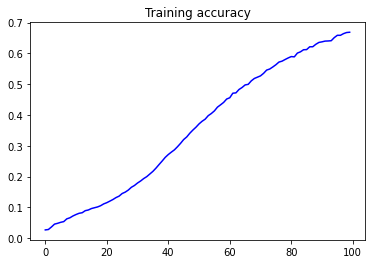

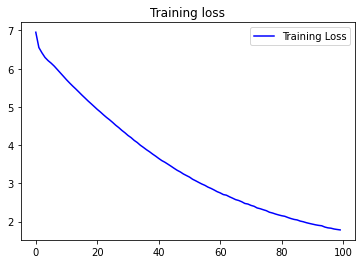

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [11]:
seed_text = "From fairest creatures we desire increase"
next_words = 10

In [12]:
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

From fairest creatures we desire increase give one â€™ saith true true more need more joy
